# <center>Энтальпийный метод в температурной формулировке</center>

## Уравнение переноса тепла
Уравнение описывающее перенос тепловой энергии в консервативной форме:

$$\frac{\partial (\rho h)}{\partial t} + \nabla \cdot (\rho h \mathbf{v}) - \nabla \cdot (k \nabla T) = 0,$$

где $h$ - удельная энтальпия, $\rho$ - плотность, $\mathbf{v}$ - вектор скорости, $k$ - коэффициент теплопроводности, $T$ - температура.

Энтальпия, определенная с точностью до константы, связана с температурой следующим соотношением:

$$h(T) = \int_{T_{ref}}^{T} c(T') \, dT',$$

где $T_{ref}$ - некоторая опорная (референсная) температура, $c(T)$ - удельная теплоёмкость при постоянном давлении.

При наличии в рассматриваемой системе фазового перехода, энтальпия как функция тепературы $h(T)$, претерпевает разрыв при температуре фазового перехода $T_m$:

$$
    h(T) = 
    \begin{cases}
        \int_{T_0}^{T} c_s(T') dT', & T < T_m \\
        \int_{T_0}^{T_m} c_s(T') dT' + L + \int_{T_m}^{T} c_l(T') dT', & T > T_m
    \end{cases}
$$

Здесь $c_s$ - удельная теплоёмкость твёрдой фазы, $c_l$ - удельная теплоёмкость жидкой фазы и $L$ - скрытая теплота фазового перехода. Положим для простоты $c_s$ и $c_l$ постоянными, а в качестве опорной температры возьмём температуру фазового перехода $T_m$. Тогда выражение для энтальпии преобразуется в:

$$
    h(T) = 
    \begin{cases}
        c_s(T - T_m), & T < T_m \\
        L + c_l(T - T_m), & T > T_m
    \end{cases}
$$

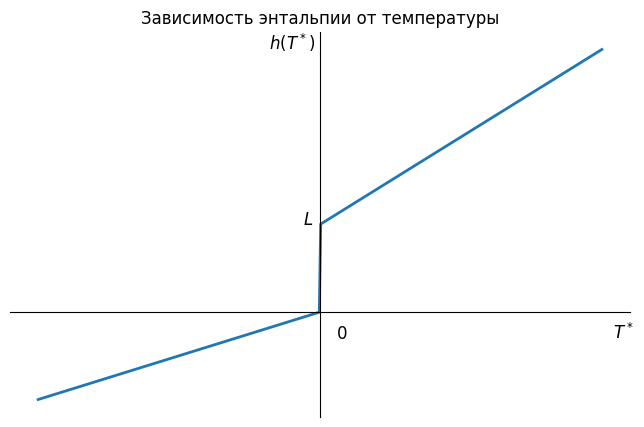

In [126]:
import numpy as np
import matplotlib.pyplot as plt

Tm = 0.0
cs = 2.0
cl = 4.0
L = 10.0

T = np.linspace(-5.0, 5.0, 400)
h = np.where(T < Tm, cs * (T - Tm), L + cl * (T - Tm))

fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Зависимость энтальпии от температуры")
ax.plot(T, h, linewidth=2)
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.text(5.2, -3.0, "$T^*$", fontsize=12)
ax.text(-0.9, 30.0, "$h(T^*)$", fontsize=12)
ax.text(0.3, -3.0, "0", fontsize=12)
ax.annotate(r"$L$", xy=(1, L), xytext=(-0.3, L), fontsize=12)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Введём обозначение $T^* = T - T_m$ и запишем зависимость энтальпии от температуры в более компактной форме:

$$h(T^*) = c(T^*)T^* + Lf(T^*),$$

где

$$
    c(T^*) = 
    \begin{cases}
        c_s, & T^* < 0 \\
        c_l, & T^* > 0
    \end{cases}
$$

и

$$
    f(T^*) = 
    \begin{cases}
        0, & T^* < 0 \\
        1, & T^* > 0
    \end{cases}
$$

Подставим выражение для $h(T^*)$ в уравнение переноса тепла предварительно разделив его на плотность, считая её постоянной и одинаковой для обеих фаз:

$$
\frac{\partial (c T^*)}{\partial t} + \nabla \cdot (с T^* \mathbf{v}) - \nabla \cdot (\frac{k}{\rho} \nabla T) + L\frac{\partial f}{\partial t} + L\nabla \cdot (f \mathbf{v}) = 0.
$$

Основная идея энтальпийного метода заключается в регуляризации функции $f(T^*)$. Классическим вариантом является применение кусочно-линейного сглаживания на интервале $2\Delta$ [1], [2], [3]. Однако, можно использовать и более гладкие аппроксимации: например, в работе [1] регуляризация осуществлялась с использованием гиперболического тангенса:

$$
f(T^*) = \frac{1}{2} \left[ 1 + \tanh\left( \frac{T^*}{\Delta T} \right) \right].
$$

При рассмотрении изотермического фазового перехода введение интервала $2\Delta$ является лишь численным упрощением и не несёт физического смысла, поэтому преполагается, что в зоне двухфазного состояния (mushy zone) конвективное слагаемое $L\nabla \cdot (f \mathbf{v})$ равно 0.

Стоит также отметить, что энтальпийная формулировка математически эквивалентна методу сглаженных коэффициентов (в англоязычной литературе - Apparent Heat Capacity Method или Equivalent Heat Capacity Method), однако, уравнение переноса тепла в форме, полученной выше, удобнее для дискретизации с помощью метода конечных объёмов и не требует аппроксимации дельта-функции. Недостатком метода является необходимость в итерационной процедуре для определения слагаемого $L\frac{\partial f}{\partial t}$, в то время как метод сглаженных коэффициентов допускает простую линеаризацию, когда коэффициенты расчитываются по температуре с предыдущего временного шага.

## Метод конечных объёмов

Введём безразмерные переменные:

$$
    x' = \frac{x}{H}, \quad y' = \frac{y}{H}, \quad t' = \frac{t}{H / U}, \quad u' = \frac{u}{U}, \quad v' = \frac{v}{U}, \quad T' = \frac{T^*}{\delta T}.
$$

Обезразмеренное уравнение переноса тепла:

$$
\frac{\partial (c' T')}{\partial t'} + \nabla' \cdot (с' T' \mathbf{v'}) - \frac{1}{Pe}\nabla' \cdot (k' \nabla' T') + \frac{1}{Ste}\frac{\partial f}{\partial t'} = 0.
$$

Здесь $Pe = \frac{c_l \rho U H}{k_l}$ - число Пекле, $Ste = \frac{c_l \delta T}{L}$ - число Стефана, $c' = c / c_l$, $k' = k / k_l$. Далее обезразмеренные независимые переменные для удобства будут записываться без штрихов:

$$
\frac{\partial (c' T)}{\partial t} + \nabla \cdot (с' T \mathbf{v}) - \frac{1}{Pe}\nabla \cdot (k' \nabla T) + \frac{1}{Ste}\frac{\partial f}{\partial t} = 0.
$$

Получим интегральную формулировку уравнения. Для этого проинтегрируем его по некоторому фиксированному объёму $V$:

$$
    \int_V \frac{\partial (c' T)}{\partial t} \, dV + \int_V \nabla \cdot (c' T \mathbf{v}) \, dV - \frac{1}{Pe} \int_V \nabla \cdot (k' \nabla T) \, dV + \frac{1}{Ste} \int_V \frac{\partial f}{\partial t} \, dV = 0.
$$

В слагаемых с частной производной по времени поменяем местами интегрирование по объёму и производную по времени (так как объём фиксирован). Для остальных слагаемых (второго и третьего) применим формулу Гаусса-Остроградского и заменим интеграл по объёму на интеграл по поверхности объема:

$$
    \frac{d}{dt} \int_V c' T \, dV + \int_{\partial V} c' T \mathbf{v} \cdot \mathbf{n} \, dS - \frac{1}{Pe} \int_{\partial V} k' \nabla T \cdot \mathbf{n} \, dS + \frac{1}{Ste} \frac{d}{dt} \int_V f \, dV = 0.
$$

Полученная интегральная форма уравнения служит основой для дискретизации методом конечных объёмов. На расчётной области вводится сетка (структурированная или неструктурированная) и уравнение записывается для каждой ячейки (контрольного объёма $V_p$), что гаранитирует выполнение закона сохранения энергии как для каждой отдельной ячейки, так и для всей расчётной области.

## Пример дискретизации в 2D
Пусть расчётная облаcть - квадрат $\{ (x, y) \in \mathbb{R}^2 \mid 0 \le x \le 1,\; 0 \le y \le 1 \}$. Зададим равномерную сетку:

$$
    \begin{align}
        x_i &= h_x i, \quad h_x = \frac{1}{N_x - 1} \quad i = 0, 1, \dots, N_x - 1, \\
        y_j &= h_y j, \quad h_y = \frac{1}{N_y - 1} \quad j = 0, 1, \dots, N_y - 1.
    \end{align}
$$

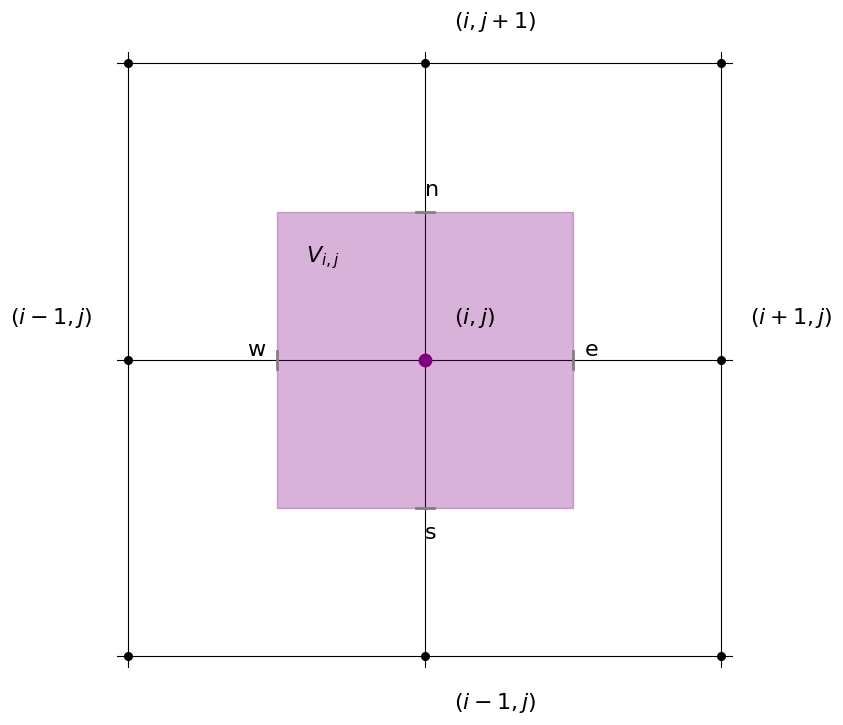

In [182]:
import matplotlib.pyplot as plt
import numpy as np

Nx, Ny = 3, 3

x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)

hx = x[1] - x[0]
hy = y[1] - y[0]

plt.figure(figsize=(8, 8))

for xi in x:
    plt.axvline(xi, color='k', linewidth=0.8)

for yj in y:
    plt.axhline(yj, color='k', linewidth=0.8)

X, Y = np.meshgrid(x, y)
plt.scatter(X, Y, color='black', s=30, zorder=5)

i_c, j_c = Nx // 2, Ny // 2
x_c, y_c = x[i_c], y[j_c]

plt.scatter(x_c, y_c, color='purple', s=80, zorder=6)

x_left = x_c - hx / 2
x_right = x_c + hx / 2
y_bottom = y_c - hy / 2
y_top = y_c + hy / 2

plt.fill_between([x_left, x_right], y_bottom, y_top, color='purple', alpha=0.3, zorder=3)

plt.plot([x_left, x_left], [y_c - tick_len/2, y_c + tick_len/2], color='gray', linewidth=2, zorder=7)
plt.plot([x_right, x_right], [y_c - tick_len/2, y_c + tick_len/2], color='gray', linewidth=2, zorder=7)
plt.plot([x_c - tick_len/2, x_c + tick_len/2], [y_bottom, y_bottom], color='gray', linewidth=2, zorder=7)
plt.plot([x_c - tick_len/2, x_c + tick_len/2], [y_top, y_top], color='gray', linewidth=2, zorder=7)

plt.text(x_c + 0.05, y_c + 0.05, r"$(i, j)$", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c - 0.2, y_c + 0.15, r"$V_{i, j}$", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c + hx + 0.05, y_c + 0.05, r"$(i + 1, j)$", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c - hx - 0.2, y_c + 0.05, r"$(i - 1, j)$", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c + 0.05, y_c + hy + 0.05, r"$(i, j + 1)$", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c + 0.05, y_c - hy - 0.1, r"$(i - 1, j)$", fontsize=16, ha='left', va='bottom', zorder=7)

plt.text(x_c + hx / 2 + 0.02, y_c, "e", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c - hx / 2 - 0.05, y_c, "w", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c, y_c + hy / 2 + 0.02, "n", fontsize=16, ha='left', va='bottom', zorder=7)
plt.text(x_c, y_c - hy / 2 - 0.06, "s", fontsize=16, ha='left', va='bottom', zorder=7)

plt.axis('off')
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.gca().set_aspect('equal')
plt.show()

Свяжем с каждым внутренним узлом сетки контрольный объём $V_{i,j}$ так, чтобы его центр совпадал с узлом (см. рисунок выше). Рассмотрим по отдельности каждое из слагаемых в интегральной форме уравнения:

$$
    \frac{d}{dt} \int_{V_{i, j}} c' T \, dV_{i, j} \approx \frac{d}{dt} (c'_{i, j} \cdot T_{i, j}) \cdot h_x \cdot h_y,
$$

$$
    \frac{d}{dt} \int_{dV_{i, j}} f \, dV_{i, j} \approx \frac{d}{dt} (f_{i, j}) \cdot h_x \cdot h_y.
$$
Здесь преполагается, что $c'T$ и $f$ изменяются линейно внутри объёма $V_{i, j}$, поэтому их объёмный интеграл можно представить как произведение значения функции в центральной точке на объём. Интегралы по поверхности контрольного объёма можно представить в виде суммы интегралов по каждой из граней объёма. Предположим также что подынтегральные выражения изменяются линейно вдоль граней объёма. Для конвективного слагемого получим сумму потоков (знаки проставлены с учётом направления внешней нормали):

$$
    \int_{\partial V_{i, j}} c' T \mathbf{v} \cdot \mathbf{n} \, dS_{i, j} \approx \Big[c'_e \cdot T_e \cdot u_e - c'_w \cdot T_w \cdot u_w \Big] h_y + \Big[c'_n \cdot T_n \cdot v_n + c'_s \cdot T_s \cdot v_s \Big] h_x.
$$

Компоненты вектора скорости $(u, w)$ в центре граней $w, e, n, s$ вычисляются либо с помощью интерполирования (как среднее между соседними узловыми значениями), либо напрямую, если уравнения Навье-Стокса решаются на смещенной сетке (staggered grid). Важным является выбор способа аппроксимации величины, переносимой конвективным потоком. Рассмотрим, например, слагаемое $c'_e \cdot T_e \cdot u_e$. Пусть $u_e > 0$. Логичным кажется аппроксимировать $c'_e \cdot T_e$ как среднее между значениями в узлах $(i,j)$ и $(i + 1, j)$:

$$
    c'_e \cdot T_e = \frac{c'_{i, j} \cdot T_{i, j} + c'_{i + 1, j} \cdot T_{i + 1, j}}{2}.
$$

Это соответсвует центрально-разностной аппроксимации в методе конечных разностей. Соответственно, точность такой аппроксимации $O(h_x^2)$. Однако, этот подход обладает рядом недостатков. Во-первых, полученное выражение не учитывает направление потока, то есть на энергию в центре грани $e$ оказывает влияние энергия выше по потоку (узел $i + 1, j$), что не имеет физического смысла при рассмотрении конвективного переноса. Во-вторых, можно показать, что для центрально-разностной аппроксимации в разложении в ряд Тейлора присутствуют дисперсионные слагамые из-за чего в решении могут возникать осцилляции. Простейшим решением этих проблем является использование противопоточной схемы (Upwind Scheme):

$$
    c'_e \cdot T_e = 
    \begin{cases}
        c'_{i, j} \cdot T_{i, j}, & u_e > 0 \\
        c'_{i+1, j} \cdot T_{i+1, j}, & u_e < 0
    \end{cases}
$$

Недостатком такой схемы явлется первый порядок точности и возникновение схемной вязкости (диффузии).

Далее аппроксимируем диффузионное слагаемое:

$$
    \int_{\partial V} k' \nabla T \cdot \mathbf{n} \, dS \approx \Big[ (k' \partial_x T)_e - (k' \partial_x T)_w \Big] h_y +
\Big[ (k' \partial_y T)_n - (k' \partial_y T)_s \Big] h_x.
$$

Производные аппроксимируем центральными разностями: 
$$
    \begin{aligned}
        (k' \partial_x T)_e &\approx k_e \, \frac{T_{i+1,j} - T_{i,j}}{h_x}, \\
        (k' \partial_x T)_w &\approx k_w \, \frac{T_{i,j} - T_{i-1,j}}{h_x}, \\
        (k' \partial_y T)_n &\approx k_n \, \frac{T_{i,j+1} - T_{i,j}}{h_y}, \\
        (k' \partial_y T)_s &\approx k_s \, \frac{T_{i,j} - T_{i,j-1}}{h_y},
    \end{aligned}
$$
Значения коэффициента $k'$ в центрах граней можно вычислять как среднее арифметическое между узловыми значениями, либо как среднее гармоническое, что рекомендуется в [3].

Дискретизация по времени может быть осуществлена, например, с использованием полностью неявной схемы или схем более высокого порядка точности. Для вычисления $c'$ и $f$ на новом шаге по времени необходимо использовать итерационный метод (например, метод Пикара или Ньютона).